In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv(f"D:\\coding\\data_en\\data\\processed\\Skytrain_data_Processed_20250121.csv")

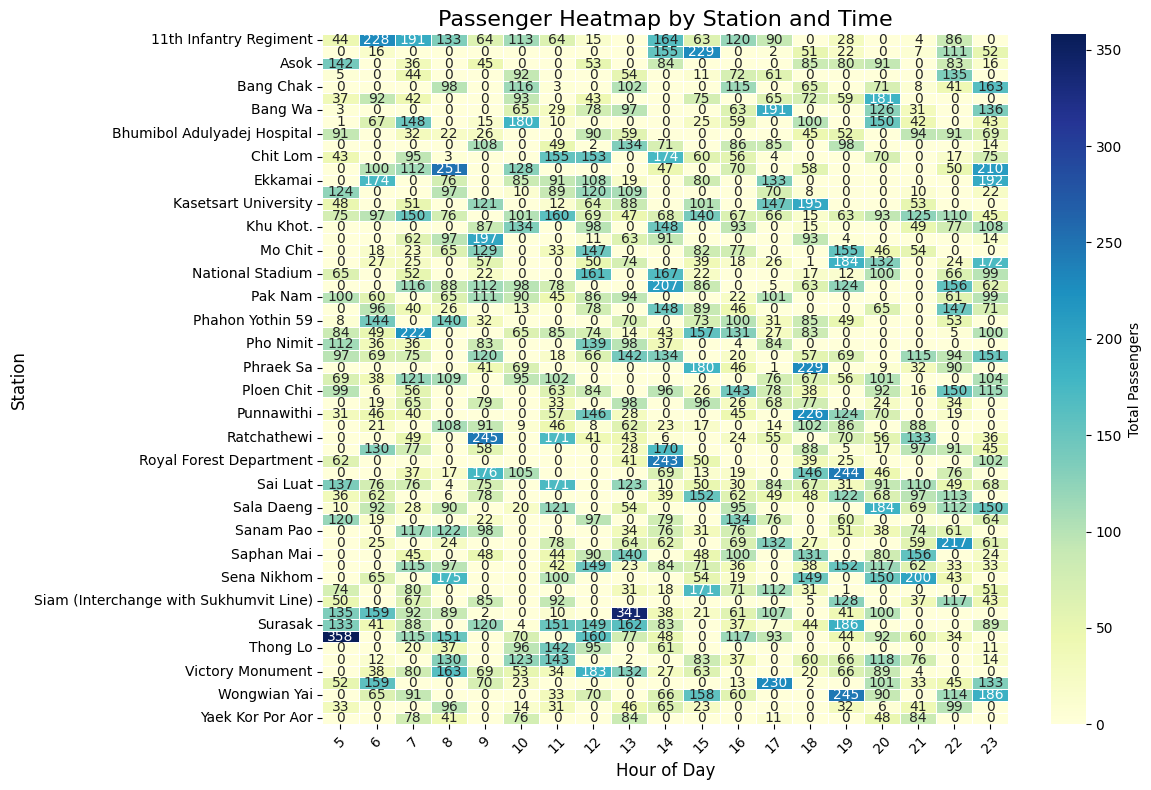

In [7]:
data['Datetime'] = pd.to_datetime(data['Date'] + ' ' + data['time'])
data['Hour'] = data['Datetime'].dt.hour

heatmap_data = data.groupby(['station', 'Hour']).agg(
    TotalPassengers=('passengers_entering', 'sum')
).reset_index()

heatmap_matrix = heatmap_data.pivot(index='station', columns='Hour', values='TotalPassengers')

heatmap_matrix.fillna(0, inplace=True)

plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_matrix,
    cmap="YlGnBu",
    annot=True,
    fmt=".0f",
    linewidths=0.5,
    cbar_kws={'label': 'Total Passengers'},
)

plt.title("Passenger Heatmap by Station and Time", fontsize=16)
plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Station", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [14]:
month_order = ['January', 'February', 'March']
data['Month'] = pd.Categorical(data['Month'], categories=month_order, ordered=True)

monthly_station_data = data.groupby(['Month', 'station']).agg(
    TotalEntering=('passengers_entering', 'sum'),
    TotalExiting=('passengers_exiting', 'sum')
).reset_index()

monthly_station_data['TotalPassengers'] = monthly_station_data['TotalEntering'] + monthly_station_data['TotalExiting']

busiest_stations = monthly_station_data.loc[
    monthly_station_data.groupby('Month')['TotalPassengers'].idxmax()
]





        Month       station  TotalEntering  TotalExiting  TotalPassengers
30    January    Ploen Chit            717           743             1460
74   February         Kheha            710           690             1400
174     March  Wongwian Yai            668           514             1182


C:\Users\Poramee Piyapun\AppData\Local\Temp\ipykernel_9896\430747623.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_station_data = data.groupby(['Month', 'station']).agg(
C:\Users\Poramee Piyapun\AppData\Local\Temp\ipykernel_9896\430747623.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_station_data.groupby('Month')['TotalPassengers'].idxmax()


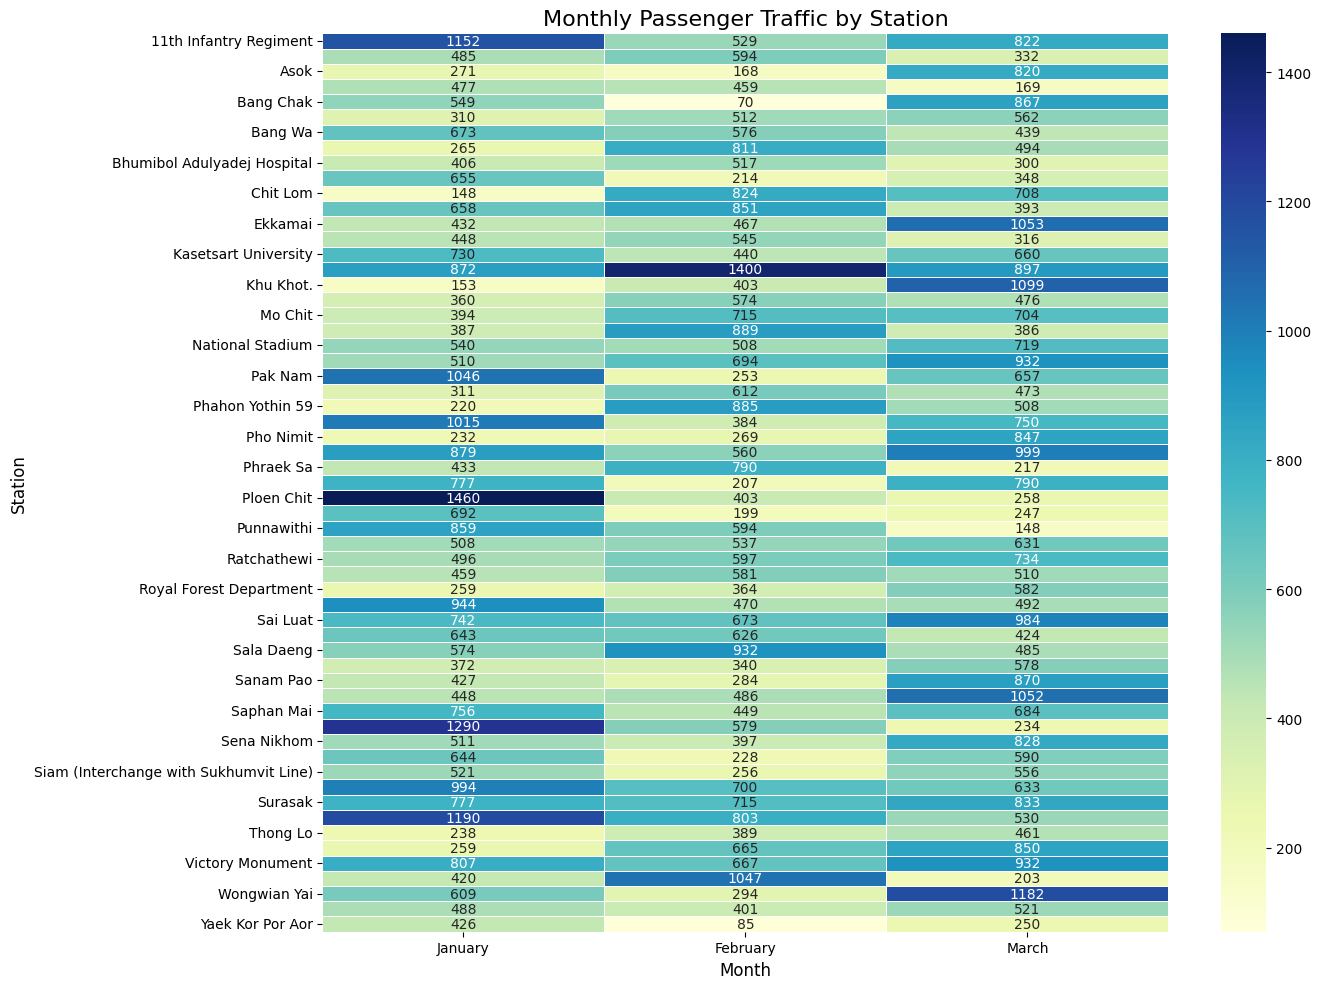

In [ ]:
heatmap_data = monthly_station_data.pivot(
    index='station', 
    columns='Month', 
    values='TotalPassengers'
).fillna(0)

plt.figure(figsize=(14, 10))
sns.heatmap(
    heatmap_data, 
    cmap='YlGnBu', 
    annot=True, 
    fmt=".0f", 
    linewidths=.5
)
plt.title('Monthly Passenger Traffic by Station', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Station', fontsize=12)
plt.tight_layout()
plt.show()